# Joins
In pandas, joining refers to combining different DataFrame objects into a single DataFrame based on one or more common columns. Pandas provides several methods for joining DataFrames, including:

# merge():
The merge() function in pandas is similar to the SQL JOIN operation. It allows you to combine DataFrames based on one or more common columns using inner, outer, left, or right joins.

## Syntax:
```pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame')```

# Different Types of Joins in Pandas
The Pandas module contains various features to perform various operations on Dataframes like join, concatenate, delete, add, etc. In this article, we are going to discuss the various types of join operations that can be performed on Pandas Dataframe. There are five types of Joins in Pandas.

- Inner Join
- Left Outer Join
- Right Outer Join
- Full Outer Join or simply Outer Join
- Index Join


In [ ]:
import pandas as pd

In [12]:
d = {'id': [1, 2, 10, 12], 
     'val1': ['a', 'b', 'c', 'd']}
a1=pd.DataFrame(d)

In [13]:
d1 = {'id': [1, 2, 9, 8],
     'val1': ['p', 'q', 'r', 's']}
a2=pd.DataFrame(d1)

In [14]:
a1

,id,val1
0,1,a
1,2,b
2,10,c
3,12,d


In [15]:
a2

,id,val1
0,1,p
1,2,q
2,9,r
3,8,s


##  Pandas Inner Join:
Inner join is the most common type of join you’ll be working with. It returns a Dataframe with only those rows that have common characteristics. This is similar to the intersection of two sets.



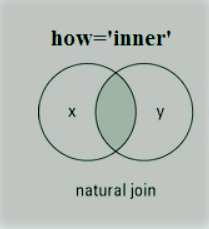

In [16]:
pd.merge(a1,a2,how="inner",on="id")

,id,val1_x,val1_y
0,1,a,p
1,2,b,q


## Pandas Left Join:
With a left outer join, all the records from the first Dataframe will be displayed, irrespective of whether the keys in the first Dataframe can be found in the second Dataframe. Whereas, for the second Dataframe, only the records with the keys in the second Dataframe that can be found in the first Dataframe will be displayed

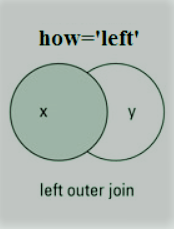

In [17]:
pd.merge(a1,a2,how="left",on="id")

,id,val1_x,val1_y
0,1,a,p
1,2,b,q
2,10,c,NaN
3,12,d,NaN


# Pandas Right Outer Join:
For a right join, all the records from the second Dataframe will be displayed. However, only the records with the keys in the first Dataframe that can be found in the second Dataframe will be displayed

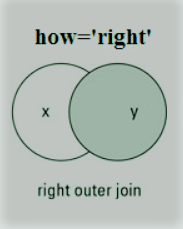

In [18]:
pd.merge(a1,a2,how="right",on="id")

,id,val1_x,val1_y
0,1,a,p
1,2,b,q
2,9,NaN,r
3,8,NaN,s


# Pandas Full Outer Join:
A full outer join returns all the rows from the left Dataframe, and all the rows from the right Dataframe, and matches up rows where possible, with NaNs elsewhere. But if the Dataframe is complete, then we get the same output.



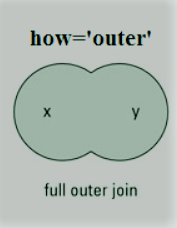

In [19]:
pd.merge(a1,a2,how="outer",on="id")

,id,val1_x,val1_y
0,1,a,p
1,2,b,q
2,10,c,NaN
3,12,d,NaN
4,9,NaN,r
5,8,NaN,s


# Cross join:


In [20]:
pd.merge(a1,a2,how="cross")

,id_x,val1_x,id_y,val1_y
0,1,a,1,p
1,1,a,2,q
2,1,a,9,r
3,1,a,8,s
4,2,b,1,p
5,2,b,2,q
6,2,b,9,r
7,2,b,8,s
8,10,c,1,p
9,10,c,2,q


In [21]:
jntu_branch = pd.DataFrame({'empid':[100,101,102,103],
                    'Name':['Ramya',"Anumula","Bhargavi","Nagaraju"],
                   "Salary":[30000,40000,50000,60000]})


In [22]:
gachibowli_branch = pd.DataFrame({ 'empid' : [100,105,110,103],
                    'Name':['Ramya',"ram","abhi","nagaraju"],
                   "Salary":[30000,40000,50000,60000]})

In [23]:
jntu_branch

,empid,Name,Salary
0,100,Ramya,30000
1,101,Anumula,40000
2,102,Bhargavi,50000
3,103,Nagaraju,60000


In [24]:
gachibowli_branch

,empid,Name,Salary
0,100,Ramya,30000
1,105,ram,40000
2,110,abhi,50000
3,103,nagaraju,60000


In [25]:
hitech_branch = pd.DataFrame({ 'empid' : [101,120,125,103],
                    'Name':['Anumula',"swetha","laxmi","nagaraju"],
                   "Salary":[30000,40000,50000,60000]})
hitech_branch 

,empid,Name,Salary
0,101,Anumula,30000
1,120,swetha,40000
2,125,laxmi,50000
3,103,nagaraju,60000


In [26]:
# get the info of people who are working in both hitec_city and gachibowli_branch

In [27]:
df7=pd.merge(hitech_branch,gachibowli_branch,how="inner",on="empid" )

In [28]:
df7

,empid,Name_x,Salary_x,Name_y,Salary_y
0,103,nagaraju,60000,nagaraju,60000


In [29]:
# get the total salary of people who are working in both hitec_city and gachibowli_branch

In [30]:
df7["Total_Salary"]=df7["Salary_x"]+df7["Salary_y"]

In [31]:
df7

,empid,Name_x,Salary_x,Name_y,Salary_y,Total_Salary
0,103,nagaraju,60000,nagaraju,60000,120000


In [32]:
# get the people who are working in jntu but not in hitech_city

In [33]:
df1=pd.merge(jntu_branch,hitech_branch,how="left",on="empid")

In [34]:
df1

,empid,Name_x,Salary_x,Name_y,Salary_y
0,100,Ramya,30000,NaN,NaN
1,101,Anumula,40000,Anumula,30000.0
2,102,Bhargavi,50000,NaN,NaN
3,103,Nagaraju,60000,nagaraju,60000.0


In [35]:
df1[df1["Salary_y"].isnull()]

,empid,Name_x,Salary_x,Name_y,Salary_y
0,100,Ramya,30000,NaN,NaN
2,102,Bhargavi,50000,NaN,NaN


In [36]:
# get the people who are working in gachibowli but not in hitech_branch

In [37]:
df4=pd.merge(hitech_branch,gachibowli_branch,how="right",on="empid" )

In [38]:
df4

,empid,Name_x,Salary_x,Name_y,Salary_y
0,100,NaN,NaN,Ramya,30000
1,105,NaN,NaN,ram,40000
2,110,NaN,NaN,abhi,50000
3,103,nagaraju,60000.0,nagaraju,60000


In [42]:
df4[df4["Name_x"].isnull()][["Name_y"]]

,Name_y
0,Ramya
1,ram
2,abhi


In [39]:
df5=pd.merge(hitech_branch,gachibowli_branch,how="outer",on="empid" )

In [40]:
df5

,empid,Name_x,Salary_x,Name_y,Salary_y
0,101,Anumula,30000.0,NaN,NaN
1,120,swetha,40000.0,NaN,NaN
2,125,laxmi,50000.0,NaN,NaN
3,103,nagaraju,60000.0,nagaraju,60000.0
4,100,NaN,NaN,Ramya,30000.0
5,105,NaN,NaN,ram,40000.0
6,110,NaN,NaN,abhi,50000.0
